In [3]:
#导入所使用的包
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

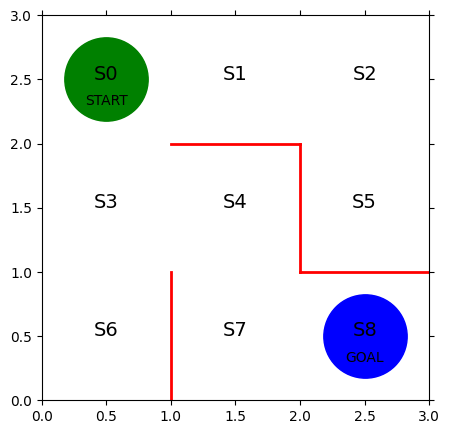

In [4]:
# 迷宫的初始位置

# 声明图的大小以及图的变量名
fig = plt.figure(figsize=(5,5))
ax = plt.gca()# 画出红色的墙壁


plt.plot([1,1], [0,1], color = 'red', linewidth = 2)
plt.plot([1,2], [2,2], color = 'red', linewidth = 2)
plt.plot([2,2], [2,1], color = 'red', linewidth = 2)
plt.plot([2,3], [1,1], color = 'red', linewidth = 2)

# 画出表示状态的文字SØ~S8
plt.text(0.5,2.5, 'S0', size = 14, ha = 'center')
plt.text(1.5,2.5, 'S1', size = 14, ha = 'center')
plt.text(2.5,2.5, 'S2', size = 14, ha = 'center')
plt.text(0.5,1.5, 'S3', size = 14, ha = 'center')
plt.text(1.5,1.5, 'S4', size = 14, ha = 'center')
plt.text(2.5,1.5, 'S5', size = 14, ha = 'center')
plt.text(0.5,0.5, 'S6', size = 14, ha = 'center')
plt.text(1.5,0.5, 'S7', size = 14, ha = 'center')
plt.text(2.5,0.5, 'S8', size = 14, ha = 'center')
plt.text(0.5,2.3, 'START', ha = 'center')
plt.text(2.5,0.3, 'GOAL', ha = 'center')

# 设定画图的范围
ax.set_xlim(0,3)
ax.set_ylim(0,3)
plt.tick_params(axis = 'both', which = 'both', bottom = 'off', top = 'off',         
 labelbottom = 'off', right = 'ff', left = 'off', labelleft = 'off')

# 当前位置SØ用绿色圆圈画出
line,  = ax.plot([0.5], [2.5], marker = "o", color = 'g', markersize = 60)

line,  = ax.plot([2.5], [0.5], marker = "o", color = 'b', markersize = 60)

In [5]:
# 行为状态0~7，列为用↑、→、↓、←表示的移动方
theta_0 = np.array([[np.nan, 1, 1, np.nan], # S0
                    [np.nan, 1, np.nan, 1], # S1
                    [np.nan, np.nan, 1, 1], # S2
                    [1, 1, 1, np.nan], # S3
                    [np.nan, np.nan, 1, 1], # S4
                    [1, np.nan, np.nan, np.nan], # S5
                    [1, np.nan, np.nan, np.nan], # S6
                    [1, 1, np.nan, np.nan], # S7
])

In [6]:
# 将策略参数θ转换为行动策略π的函数的定义
def simple_convert_into_pi_from_theta(theta):
    '''简单的计算转换函数'''
    [m, n] = theta.shape # 获取theta的行列数
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
    pi = np.nan_to_num(pi)
    return pi

pi_0 = simple_convert_into_pi_from_theta(theta_0)
pi_0

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ]])

In [7]:
def get_next_s(pi, s):
    direction = ["up", "right", "down", "left"]
    next_direction = np.random.choice(direction, p = pi[s, :])
    if next_direction == "up":
        s_next = s - 3
    elif next_direction == "right":
        s_next = s + 1
    elif next_direction == "down":
        s_next = s + 3
    elif next_direction == "left":
        s_next = s - 1
    return s_next
  


In [ ]:
def goal_maze(pi):
    s = 0
    state_history = [0]
    while (1):
        next_s = get_next_s(pi, s)
        state_history.append(next_s)
        if next_s == 8:
            break
        else:
            s = next_s
    return state_history
  
state_history = goal_maze(pi_0)
print(state_history)
print("迷宫的步数为" + str(len(state_history) - 1) + "步")

